# WHEAT DISEASE CLASSIFICATION

# OBJECTIVE

## The moto of this project is to Identify the appropriate wheat disease by image processing and classification using Convolutional neural network (CNN).

# Installing and importing libraries


In [2]:
! pip install opencv-python

     -------------------------------------- 35.4/35.4 MB 538.6 kB/s eta 0:00:00


In [115]:
! pip install pandas

     ---------------------------------------- 10.6/10.6 MB 1.1 MB/s eta 0:00:00


In [43]:
!pip install keras

     ---------------------------------------- 1.4/1.4 MB 263.8 kB/s eta 0:00:00


In [22]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.2/7.2 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 37.0/37.0 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 KB 4.7 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=342e67f4a60044a2f0bb86d50c6775365b4bbe7a3126105e0109bff258640127
  Stored in directory: c:\users\akash tamate\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn


In [50]:
! pip install --no-cache-dir tensorflow

     -------------------------------------- 438.0/438.0 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 KB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB ? eta 0:00:00
     ---------------------------------------- 65.5/65.5 KB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 126.7/126.7 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 462.5/462.5 KB 2.6 MB/s eta 0:00:00
     -------------------------------------- 903.8/903.8 KB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.2 MB/s eta 0:00:00
     --------------------------

In [109]:
! pip install seaborn

     ------------------------------------ 292.8/292.8 KB 464.0 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import cv2 #To convert images to array
import os #To specify location of images
import random
import math

# METHODOLOGY

## To achieve the above mentioned objective, a series of cronological methods have been followed as listed below:

- **Data collection and preprocessing**: Image dataset of various diseased and healthy leaves is stored in a directory and is classified. Images of prominent wheat diseases such as Leaf rust, Nitrogen deficiency and septoria is used in this model. Along with the diseased images a set of healthy leaves images are also fed to the model for better classification

- **Establishing a baseline** : In this step, a process of building a datum model is carried out. A model is created with certian number of layers (Convolutional, dense, etc.), activation function, epochs, loss function, etc. Furthermore, the model is complied, deployed and evaluated.

- **Enhancing the model** : In this step, the baseline model is rebuilt by playing with the parameters of the model. With the help of graphical visualization the model's accuracy or performance can be evaluated and enhanced.



# DATA PREPROCESSING

In [3]:
DIR = (path to dataset)
#Creating a Dir
catg = ['Healthy', 'LeafRust', 'NDeficiency', 'septoria']

In [4]:
IMG_SIZE = 120

data = []

for category in catg:
    folder = os.path.join(DIR, category) 
    #Joins 2 different paths, in this case its DIR and Catg
    label = catg.index(category)
    for img in os.listdir(folder): #Lists all the particular dir present in the folder
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])

In [5]:
len(data)

908

In [6]:
random.shuffle(data)

In [106]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [107]:
X = np.array(X)
y = np.array(y)

# Establishing the baseline/datum model

In [9]:
X = X/255 #scaling

In [10]:
X.shape

(908, 120, 120, 3)

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(4,activation = 'softmax'))

In [14]:
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit(X, y, epochs=10, batch_size = 4, validation_split=0.1)

Epoch 1/10
205/205 [==============================] - 11s 47ms/step - loss: 0.8889 - accuracy: 0.5312 - val_loss: 0.6849 - val_accuracy: 0.6154
Epoch 2/10
205/205 [==============================] - 9s 45ms/step - loss: 0.6765 - accuracy: 0.6707 - val_loss: 0.5553 - val_accuracy: 0.8132
Epoch 3/10
205/205 [==============================] - 9s 45ms/step - loss: 0.4081 - accuracy: 0.8494 - val_loss: 0.4372 - val_accuracy: 0.7802
Epoch 4/10
205/205 [==============================] - 9s 45ms/step - loss: 0.2539 - accuracy: 0.9180 - val_loss: 0.2662 - val_accuracy: 0.9011
Epoch 5/10
205/205 [==============================] - 9s 45ms/step - loss: 0.2191 - accuracy: 0.9266 - val_loss: 0.2398 - val_accuracy: 0.9451
Epoch 6/10
205/205 [==============================] - 9s 45ms/step - loss: 0.1547 - accuracy: 0.9449 - val_loss: 0.1919 - val_accuracy: 0.9670
Epoch 7/10
205/205 [==============================] - 9s 45ms/step - loss: 0.1879 - accuracy: 0.9364 - val_loss: 0.4993 - val_accuracy: 0.912

In [16]:
hist = history.history
hist = pd.DataFrame(hist)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
5,0.154665,0.944920,0.191894,0.967033,5
6,0.187914,0.936352,0.499315,0.912088,6
7,0.142888,0.954712,0.183990,0.967033,7
8,0.098178,0.973072,0.297594,0.967033,8
9,0.095109,0.975520,0.334586,0.956044,9


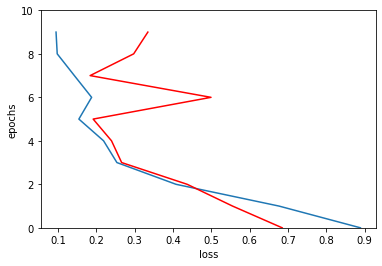

In [17]:
plt.plot(hist['loss'], hist['epoch'])
plt.plot(hist['val_loss'], hist['epoch'], color = 'r')

plt.ylim([0,10])
plt.xlabel('loss')
plt.ylabel('epochs')
plt.show()

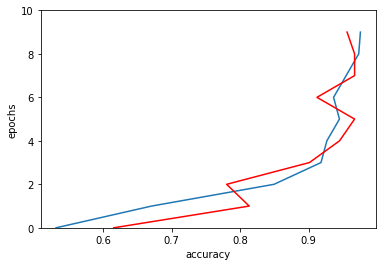

In [18]:
plt.plot(hist['accuracy'], hist['epoch'])
plt.plot(hist['val_accuracy'], hist['epoch'], color = 'r')

plt.ylim([0,10])
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.show()

In [19]:
score  = model.evaluate(X,y,verbose = 0)
print("test loss:",score[0])
print('Test accuracy',score[1]*100)

test loss: 0.12917079031467438
Test accuracy 97.02643156051636


# # Takeaways from datum model

- **As the epochs increases the loss and validation loss decreases**
- **As the epochs increases the accuracy of the model increases**
- **The model is having an accuracy of 96% at 10th epoch**
- **The testing accuracy is 94%**

# Rebuilding the model

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(32, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(4,activation = 'softmax'))

In [22]:
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [23]:
def loss_accuracy():
    score  = model.evaluate(X,y,verbose = 0)
    print("test loss:",score[0])
    print('Test accuracy',score[1]*100)

In [24]:
def plot(hist, epochs):
    plt.plot(hist['loss'], hist['epoch'])
    plt.plot(hist['val_loss'], hist['epoch'], color = 'r')

    plt.ylim([0,epochs])
    plt.xlabel('loss')
    plt.ylabel('epochs')
    plt.show()
    loss_accuracy()

In [25]:
def fit_function(epochs, batch_size, val_split):
    history = model.fit(X, y, epochs = epochs, validation_split = val_split, batch_size = batch_size)
    hist = history.history
    hist = pd.DataFrame(hist)
    hist['epoch'] = history.epoch
    plot(hist, epochs)
    return hist.tail()

Epoch 1/10
205/205 [==============================] - 7s 29ms/step - loss: 0.8415 - accuracy: 0.5900 - val_loss: 0.6508 - val_accuracy: 0.7912
Epoch 2/10
205/205 [==============================] - 6s 28ms/step - loss: 0.3325 - accuracy: 0.8776 - val_loss: 0.2946 - val_accuracy: 0.9231
Epoch 3/10
205/205 [==============================] - 6s 28ms/step - loss: 0.2126 - accuracy: 0.9229 - val_loss: 0.3276 - val_accuracy: 0.8901
Epoch 4/10
205/205 [==============================] - 6s 28ms/step - loss: 0.1275 - accuracy: 0.9535 - val_loss: 0.2580 - val_accuracy: 0.9341
Epoch 5/10
205/205 [==============================] - 6s 28ms/step - loss: 0.1718 - accuracy: 0.9412 - val_loss: 0.2922 - val_accuracy: 0.9011
Epoch 6/10
205/205 [==============================] - 6s 29ms/step - loss: 0.0915 - accuracy: 0.9767 - val_loss: 0.3053 - val_accuracy: 0.9121
Epoch 7/10
205/205 [==============================] - 6s 28ms/step - loss: 0.0541 - accuracy: 0.9865 - val_loss: 0.4523 - val_accuracy: 0.8901

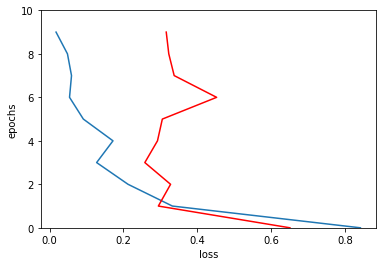

test loss: 0.038663722574710846
Test accuracy 99.66960549354553


,loss,accuracy,val_loss,val_accuracy,epoch
5,0.091511,0.976744,0.305331,0.912088,5
6,0.054146,0.986536,0.452293,0.890110,6
7,0.059496,0.981640,0.337386,0.923077,7
8,0.048532,0.981640,0.322779,0.934066,8
9,0.017635,0.998776,0.315908,0.967033,9


In [26]:
A = fit_function(10, 4, 0.1)
A

## After manipulating with layers of the model we arrived at a conclusion that, by decreasing the layers, the model performs well. This generally happens when overfitting arises. 

# The model accuracy has increased to 99% and validation accuracy has increased to 96%

# Predicting the results

In [128]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[1, 3, 1, 0, 1]

In [31]:
y[:5]

array([0, 3, 1, 0, 1])

In [120]:
input_image = int(input('ENTER ANY NUMBER BETWEEN 0 TO 907: '))


ENTER ANY NUMBER BETWEEN 0 TO 907: 5


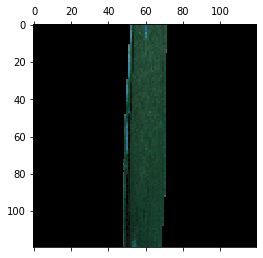

In [121]:
plt.matshow(X[input_image])
plt.show()

In [122]:
y_actual = y[input_image]
y_actual

1

In [123]:
y_predicted=model.predict(X)

In [124]:
y_predicted[input_image]

array([0., 1., 0., 0.], dtype=float32)

In [125]:
result = np.argmax(y_predicted[label1])
result

1

In [126]:
if result == 0:
    print('The Wheat crop is healthy')
elif result == 1:
    print('The Wheat crop is affected with the leaf rust')
elif result == 2:
    print('The Wheat crop has nitrogen deficiency')
elif result == 3:
    print('The Wheat crop is affected with Septoria')

The Wheat crop is affected with the leaf rust


In [129]:
cm=tf.math.confusion_matrix(labels=y,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[ 92, 250,   1,   0],
       [  0, 258,   0,   0],
       [  0,  76, 137,   0],
       [  0,   0,   1,  98]])>

Text(69.0, 0.5, 'truth')

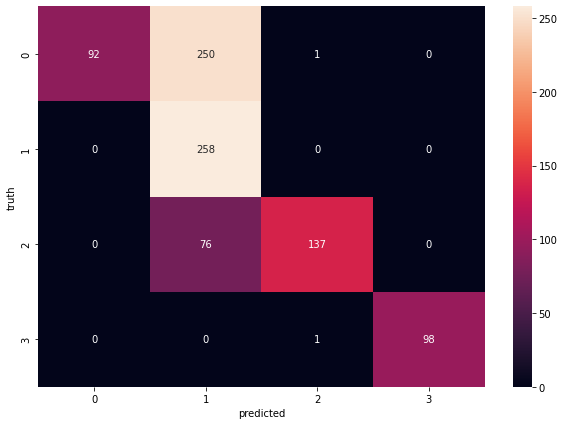

In [130]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

# CONCLUSION:

## The trained model gives accurate results. The model successfuly identifies the wheat disease with almost 99% accuracy. 